# Analyze Experiment Results

In [7]:
import pickle
import os
import sys

# include parent directory in path
parent_dir = os.path.abspath('../..')
sys.path.append(parent_dir)

if os.path.exists('clients.pkl'):
    with open('clients.pkl', 'rb') as file:
        clients = pickle.load(file)
else:
    print('No clients found')


In [8]:
# imports
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd


### Early Stopping

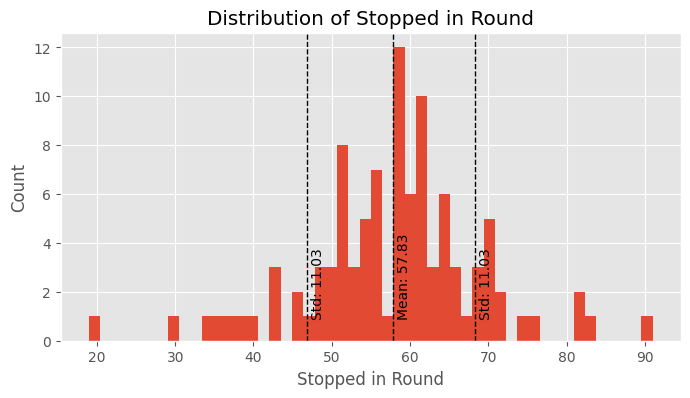

In [11]:
plt.figure(figsize=(8, 4))

stops = []
for client in clients:
    stops.append(len(client.val_acc_list))
plt.hist(stops, bins=50)
plt.xlabel('Stopped in Round')
plt.ylabel('Count')
plt.title('Distribution of Stopped in Round')

# plt mean and standard deviation
mean = np.mean(stops)
std = np.std(stops)
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)
plt.text(mean + .5, 1, 'Mean: {:.2f}'.format(mean), rotation=90)
plt.axvline(mean + std - .5, color='k', linestyle='dashed', linewidth=1)
plt.text(mean + std, 1, 'Std: {:.2f}'.format(std), rotation=90)
plt.axvline(mean - std, color='k', linestyle='dashed', linewidth=1)
plt.text(mean - std + .5, 1, 'Std: {:.2f}'.format(std), rotation=90)

plt.show()

### Validation Accuracy

AttributeError: 'Client' object has no attribute 'val_accs_post_exchange'

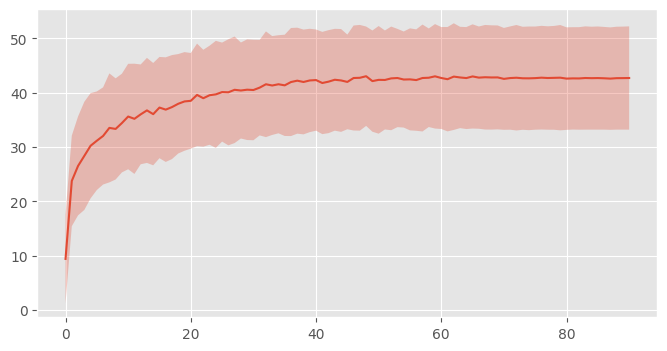

In [5]:
plt.figure(figsize=(8, 4))

# extend val_loss_list for each client to be as long as the longest one
max_len = max([len(client.val_acc_list) for client in clients])
# pad end with last value
for client in clients:
    client.val_acc_list.extend([client.val_acc_list[-1]] * (max_len - len(client.val_acc_list)))

avg_acc = np.mean([client.val_acc_list for client in clients], axis=0)
std_acc = np.std([client.val_acc_list for client in clients], axis=0)
plt.plot(avg_acc)
plt.fill_between(range(len(avg_acc)), avg_acc - std_acc, avg_acc + std_acc, alpha=0.3)

post_exchange_acc = np.mean([client.val_accs_post_exchange for client in clients], axis=0)

plt.plot(post_exchange_acc)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Average Validation Accuracy')
plt.legend(['Validation Accuracy', '1 stddev','Post-Exchange Validation Accuracy'])


### Validation and Training Loss

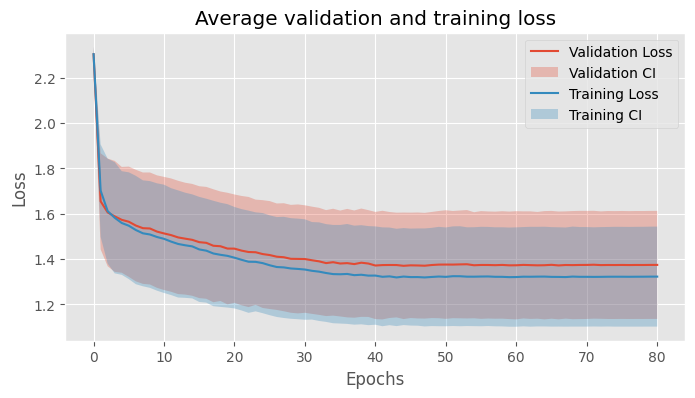

In [ ]:
plt.figure(figsize=(8, 4))

# extend val_loss_list for each client to be as long as the longest one
max_len = max([len(client.val_loss_list) for client in clients])
# pad end with last value
for client in clients:
    client.val_loss_list.extend([client.val_loss_list[-1]] * (max_len - len(client.val_loss_list)))

# extend train_loss_list for each client to be as long as the longest one
max_len = max([len(client.train_loss_list) for client in clients])
# pad end with last value
for client in clients:
    client.train_loss_list.extend([client.train_loss_list[-1]] * (max_len - len(client.train_loss_list)))

avg_val_loss = np.mean([client.val_loss_list for client in clients], axis=0)
std_val_loss = np.std([client.val_loss_list for client in clients], axis=0)
plt.plot(avg_val_loss)
plt.fill_between(range(len(avg_val_loss)), avg_val_loss - std_val_loss, avg_val_loss + std_val_loss, alpha=0.3)
plt.xlabel('Epochs')
plt.ylabel('Loss')

avg_train_loss = np.mean([client.train_loss_list for client in clients], axis=0)
std_train_loss = np.std([client.train_loss_list for client in clients], axis=0)
plt.plot(avg_train_loss)
plt.fill_between(range(len(avg_train_loss)), avg_train_loss - std_train_loss, avg_train_loss + std_train_loss, alpha=0.3)

plt.title('Average validation and training loss')
plt.legend(['Validation Loss', 'Validation CI', 'Training Loss', 'Training CI'])
plt.show()

### Heatmaps

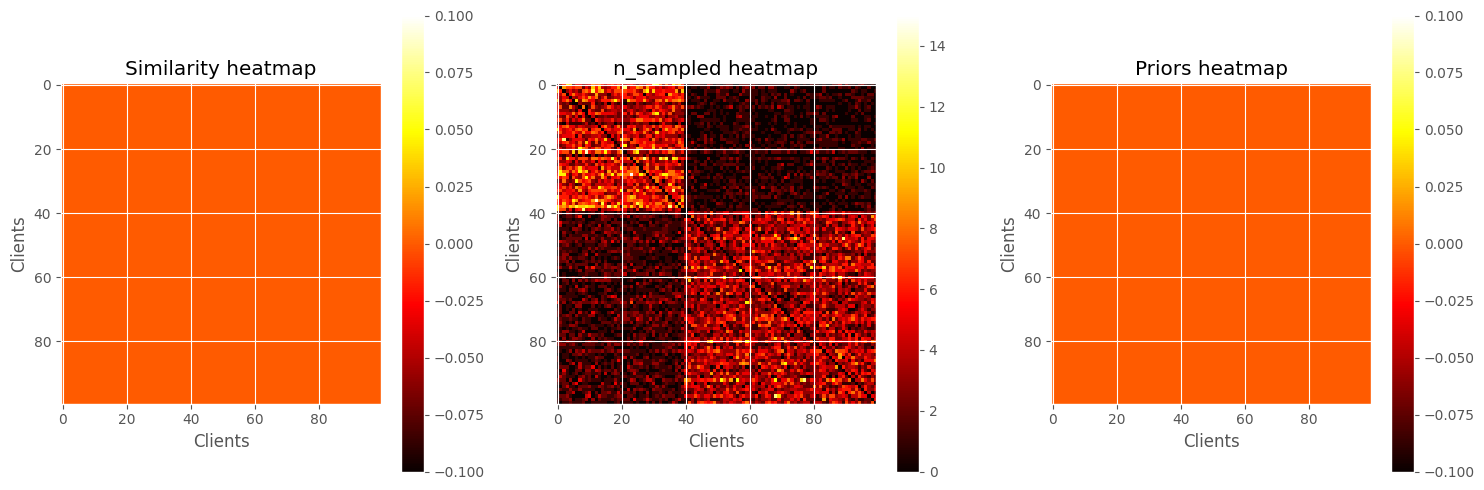

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Similarity heatmap
similarity_matrix = np.zeros((len(clients), len(clients)))
for i, client in enumerate(clients):
    similarity_matrix[i] = client.similarity_scores
im = axes[0].imshow(similarity_matrix, cmap='hot', interpolation='nearest')
axes[0].set_title('Similarity heatmap')
axes[0].set_xlabel('Clients')
axes[0].set_ylabel('Clients')
fig.colorbar(im, ax=axes[0])


# n_sampled heatmap
n_sampled_matrix = np.zeros((len(clients), len(clients)))
for i, client in enumerate(clients):
    n_sampled_matrix[i] = client.n_sampled
im = axes[1].imshow(n_sampled_matrix, cmap='hot', interpolation='nearest')
axes[1].set_title('n_sampled heatmap')
axes[1].set_xlabel('Clients')
axes[1].set_ylabel('Clients')
fig.colorbar(im, ax=axes[1])

# priors heatmap
priors_matrix = np.zeros((len(clients), len(clients)))
for i, client in enumerate(clients):
    priors_matrix[i] = client.priors
im = axes[2].imshow(priors_matrix, cmap='hot', interpolation='nearest')
axes[2].set_title('Priors heatmap')
axes[2].set_xlabel('Clients')
axes[2].set_ylabel('Clients')
fig.colorbar(im, ax=axes[2])

plt.tight_layout()
plt.show()


### Cluster-wise accuracies

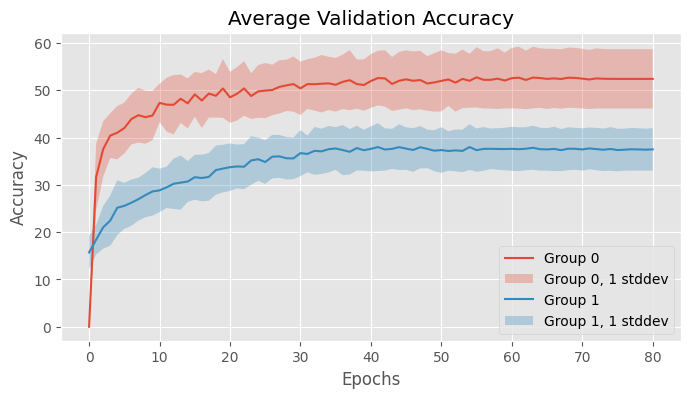

In [ ]:
plt.figure(figsize=(8, 4))
for group in range(2):
    avg_acc = np.mean([client.val_acc_list for client in clients if client.group == group], axis=0)
    std_acc = np.std([client.val_acc_list for client in clients if client.group == group], axis=0)
    plt.plot(avg_acc)
    plt.fill_between(range(len(avg_acc)), avg_acc - std_acc, avg_acc + std_acc, alpha=0.3)
    
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Average Validation Accuracy')
plt.legend(['Group 0', 'Group 0, 1 stddev', 'Group 1', 'Group 1, 1 stddev'])
plt.show()